In [29]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline


In [30]:
#read dataset
datav0=pd.read_csv('OnlineRetail.csv',dtype={'CustomerID': str},encoding='ISO-8859-1')
print(datav0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB
None


In [31]:
#converting the type of InvoiceDate from str to datetime
datav0['InvoiceDate']=pd.to_datetime(datav0['InvoiceDate'],infer_datetime_format=True)
print(datav0.info())
"""observed that columns 'Description' and 'CustomerId' are having null values.
Need to investigate further"""
# type of all columns is good to go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB
None


"observed that columns 'Description' and 'CustomerId' are having null values.\nNeed to investigate further"

In [32]:
#looking into the null values
null_analysis=pd.DataFrame(datav0.isna().sum(), columns=['missing_count'])
null_analysis=null_analysis.assign(missing_per=null_analysis['missing_count']/datav0.shape[0]*100)
print(null_analysis)
#print view of dataset
display(datav0) 
"""0.26% of rows missing from column 'Description' and 25% of rows missing from 'CustomerId'"""

             missing_count  missing_per
InvoiceNo                0     0.000000
StockCode                0     0.000000
Description           1454     0.268311
Quantity                 0     0.000000
InvoiceDate              0     0.000000
UnitPrice                0     0.000000
CustomerID          135080    24.926694
Country                  0     0.000000


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France


"0.26% of rows missing from column 'Description' and 25% of rows missing from 'CustomerId'"

In [33]:
"""dropping the entries associated with missing customerID 
as we are performing the segmentation of customers and
it is not possible to impute the customers altogether"""
datav1=datav0[~datav0['CustomerID'].isna()]
print(datav1.shape)
#checking for null values again
print(datav1.isna().sum())
# so now the final dataset having no missing values in any of the columns
"""after dropping rows, the dataset is having 406829 rows"""

(406829, 8)
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


'after dropping rows, the dataset is having 406829 rows'

In [34]:
#Now check for dublicate entries present in whole dataset
print('duplicate rows: {}'.format(datav1.duplicated().sum()))
"""indicating 5225 rows which are complete duplicates and 
these rows is not adding and information in the dataset. so drop it"""
datav2=datav1.drop_duplicates()
print('shape after dropping dublicates: {}'.format(datav2.shape)) #left with dataset of size 401604 rows and 8 columns

duplicate rows: 5225
shape after dropping dublicates: (401604, 8)


            Quantity      UnitPrice
count  401604.000000  401604.000000
mean       12.183273       3.474064
std       250.283037      69.764035
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000


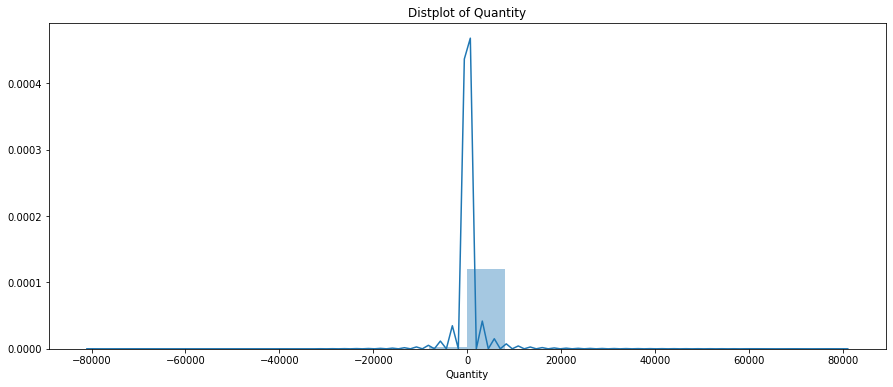

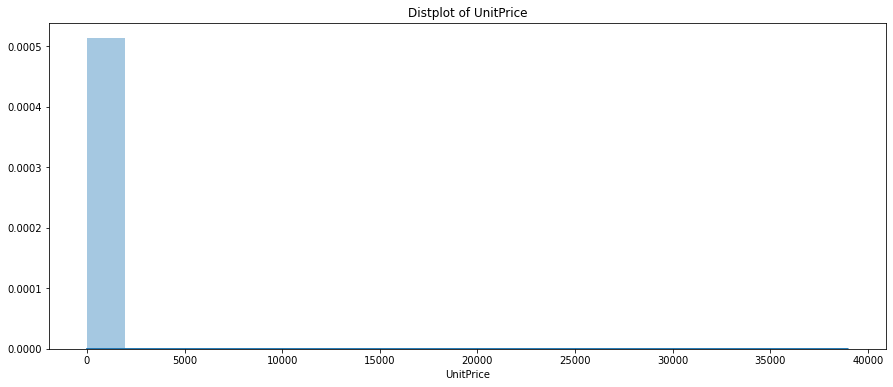

In [35]:
print(datav2.describe())

plt.figure(1 , figsize = (15 , 6))
sns.distplot(datav2['Quantity'] , bins = 20)
#plt.hist(datav2[x])
plt.title('Distplot of {}'.format('Quantity'))
plt.show()

plt.figure(1 , figsize = (15 , 6))
sns.distplot(datav2['UnitPrice'] , bins = 20)
#plt.hist(datav2[x])
plt.title('Distplot of {}'.format('UnitPrice'))
plt.show()



In [36]:
#look for canceled transactions


"""at the level of product, 8872 products has been canceled out of 401604"""



datav2['Order_canceled']=datav2['InvoiceNo'].apply(lambda x:int('C' in x))
canceled_analysis=datav2[datav2['Order_canceled']==1]
canceled_analysis['TotalPrice_canceled'] = canceled_analysis['UnitPrice'] * canceled_analysis['Quantity']

print('Total product canceled: {}, Total product: {}, Total percentage of products canceled: {}'.format(canceled_analysis.shape[0],datav2.shape[0],canceled_analysis.shape[0]/datav2.shape[0]*100))

#display(canceled_analysis)
print(canceled_analysis.info())
print(canceled_analysis.describe())
#display(canceled_analysis)





Total product canceled: 8872, Total product: 401604, Total percentage of products canceled: 2.209141343213713
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8872 entries, 141 to 541717
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            8872 non-null   object        
 1   StockCode            8872 non-null   object        
 2   Description          8872 non-null   object        
 3   Quantity             8872 non-null   int64         
 4   InvoiceDate          8872 non-null   datetime64[ns]
 5   UnitPrice            8872 non-null   float64       
 6   CustomerID           8872 non-null   object        
 7   Country              8872 non-null   object        
 8   Order_canceled       8872 non-null   int64         
 9   TotalPrice_canceled  8872 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 762.4+ KB
None
       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


           Quantity     UnitPrice  Order_canceled  TotalPrice_canceled
count   8872.000000   8872.000000          8872.0          8872.000000
mean     -30.774910     18.899512             1.0           -68.607920
std     1172.249902    445.190864             0.0          2022.869636
min   -80995.000000      0.010000             1.0       -168469.600000
25%       -6.000000      1.450000             1.0           -17.000000
50%       -2.000000      2.950000             1.0            -8.500000
75%       -1.000000      4.950000             1.0            -3.300000
max       -1.000000  38970.000000             1.0            -0.120000
          Unique_customers  #transactions  country
Unique_#              1589           3654       28
          TotalProducts
Unique_#           1920


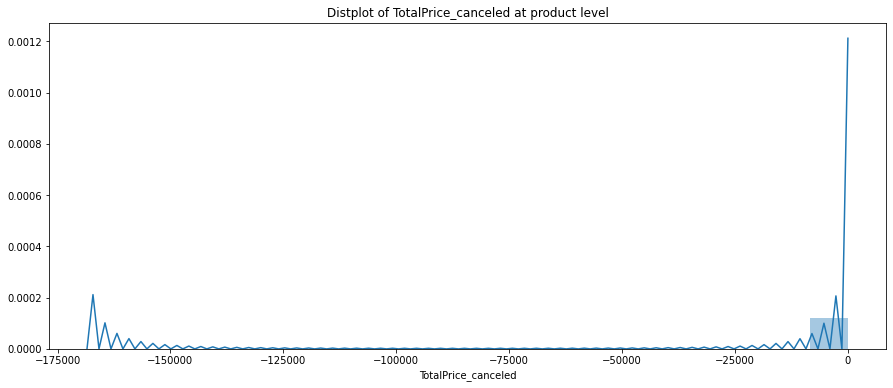

In [37]:
#canceled analysis
print(canceled_analysis.describe())

print(pd.DataFrame([{'Unique_customers': canceled_analysis['CustomerID'].nunique(),
               
               '#transactions':canceled_analysis['InvoiceNo'].nunique(),
              'country': canceled_analysis['Country'].nunique()}],index=['Unique_#'] ))

print(pd.DataFrame([{'TotalProducts': canceled_analysis['StockCode'].nunique()}],index=['Unique_#'] ))

plt.figure(1 , figsize = (15 , 6))
sns.distplot(canceled_analysis['TotalPrice_canceled'] , bins = 20)
#plt.hist(datav2[x])
plt.title('Distplot of {}'.format('TotalPrice_canceled at product level'))
plt.show()


In [38]:
#Analyse the user, products and # transaction happened
"""So in total 4372 customers has ordered 3684 products thorough 22190 transactions"""
pd.DataFrame([{'Unique_customers': datav2['CustomerID'].nunique(),
               'Unique_product': datav2['StockCode'].nunique(),
               '#transactions':datav2['InvoiceNo'].nunique(),
              'country': datav2['Country'].nunique()}],index=['Unique_#'] )


,Unique_customers,Unique_product,#transactions,country
Unique_#,4372,3684,22190,37


In [84]:
list_special_codes = datav2[datav2['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

datav2[(datav2['CustomerID']=='12536')&(datav2['StockCode']=='72586')].sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_canceled
520140,C580263,72586,SET OF 6 HALLOWEEN GHOST T-LIGHTS,-36,2011-02-12 12:43:00,0.42,12536,France,1
391590,570672,72586,SET OF 6 HALLOWEEN GHOST T-LIGHTS,36,2011-11-10 14:52:00,0.42,12536,France,0


In [59]:
df_cleaned = datav2.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  datav2.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = datav2[(datav2['CustomerID'] == col['CustomerID']) &
                         (datav2['StockCode']  == col['StockCode']) & 
                         (datav2['InvoiceDate'] < col['InvoiceDate']) & 
                         (datav2['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break         

df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)


In [60]:
print(len(entry_to_remove))
print(len(doubtfull_entry))
df_cleaned.describe()

6197
2558


,Quantity,UnitPrice,Order_canceled,QuantityCanceled
count,392849.000000,392849.000000,392849.000000,392849.000000
mean,13.144096,3.139177,0.000298,0.575257
std,181.566564,22.466597,0.017255,175.372076
min,-720.000000,0.000000,0.000000,0.000000
25%,2.000000,1.250000,0.000000,0.000000
50%,6.000000,1.950000,0.000000,0.000000
75%,12.000000,3.750000,0.000000,0.000000
max,80995.000000,8142.750000,1.000000,80995.000000


In [61]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned=df_cleaned.sort_values('CustomerID')
df_cleaned[df_cleaned['Order_canceled']==1].describe()
list_special_codes = datav2[datav2['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [87]:
display(df_cleaned[df_cleaned['Order_canceled']==1])
temp=df_cleaned[df_cleaned['Order_canceled']==1]
list_special_codes_canceled = temp[temp['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes_canceled


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_canceled,QuantityCanceled,TotalPrice
273935,C560869,D,Discount,-1,2011-07-21 14:32:00,66.24,12830,United Kingdom,1,0,-66.24
378232,C569636,23002,TRAVEL CARD WALLET SKULLS,-5,2011-05-10 12:14:00,0.42,12841,United Kingdom,1,0,-2.10
182729,C552569,D,Discount,-240,2011-10-05 12:06:00,0.03,12901,United Kingdom,1,0,-7.20
501810,C578832,47566,PARTY BUNTING,-6,2011-11-25 15:18:00,4.95,13069,United Kingdom,1,0,-29.70
501794,C578832,22379,RECYCLING BAG RETROSPOT,-15,2011-11-25 15:18:00,2.10,13069,United Kingdom,1,0,-31.50
...,...,...,...,...,...,...,...,...,...,...,...
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,1,0,-32.34
169541,C551190,D,Discount,-1,2011-04-27 10:22:00,120.00,17940,United Kingdom,1,0,-120.00
150591,C549452,D,Discount,-1,2011-08-04 14:17:00,1867.86,17940,United Kingdom,1,0,-1867.86
224503,C556530,22501,PICNIC BASKET WICKER LARGE,-3,2011-06-13 11:42:00,9.95,18109,United Kingdom,1,0,-29.85


array(['D', 'M'], dtype=object)

In [88]:
#df_cleaned[df_cleaned['CustomerID']=='12536'].sort_values('TotalPrice')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18424 entries, 1 to 18626
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   18424 non-null  object        
 1   InvoiceNo    18424 non-null  object        
 2   Country      18424 non-null  object        
 3   BasketPrice  18424 non-null  float64       
 4   InvoiceDate  18424 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 863.6+ KB
None
        BasketPrice
count  18424.000000
mean     458.106444
std      932.502115
min        0.380000
25%      155.587500
50%      300.465000
75%      464.300000
max    30757.000000


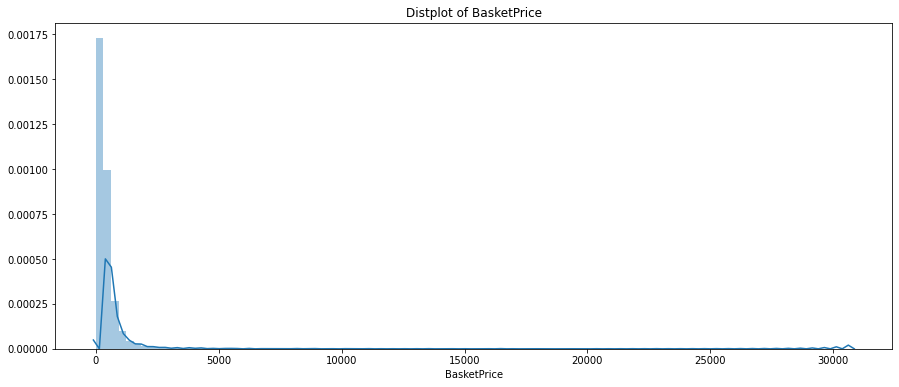

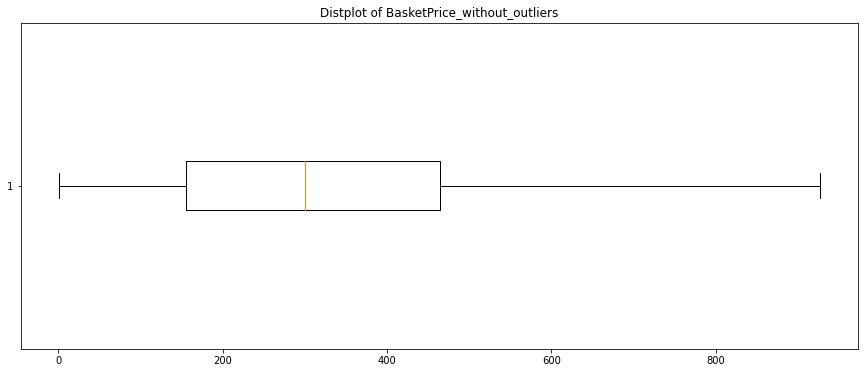

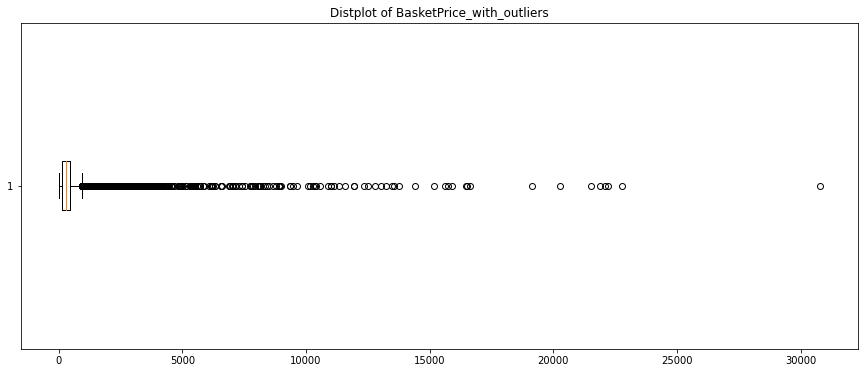

In [96]:
#prepare data at Transaction level
datav3=df_cleaned.copy()
datav3['InvoiceDate_int'] = datav3['InvoiceDate'].astype('int64')
temp= datav3.groupby(by=['CustomerID', 'InvoiceNo','Country'], as_index=False)['InvoiceDate_int'].mean()

datav3=datav3.groupby(by=['CustomerID', 'InvoiceNo','Country'], as_index=False)['TotalPrice'].sum()
datav3 = datav3.rename(columns = {'TotalPrice':'BasketPrice'})

datav3.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
datav3=datav3[datav3['BasketPrice']>0]

print(datav3.info())

print(datav3.describe())

plt.figure(1 , figsize = (15 , 6))
sns.distplot(datav3['BasketPrice'] , bins = 100)
#plt.hist(datav2[x])
plt.title('Distplot of {}'.format('BasketPrice'))
plt.show()

plt.figure(4 , figsize = (15 , 6))
plt.boxplot(datav3['BasketPrice'],showfliers =False,vert=False)
plt.title('Distplot of {}'.format('BasketPrice_without_outliers'))
plt.show()

plt.figure(4 , figsize = (15 , 6))
plt.boxplot(datav3['BasketPrice'],showfliers =True,vert=False)
plt.title('Distplot of {}'.format('BasketPrice_with_outliers'))
plt.show()

In [97]:
datav3[datav3['BasketPrice']<0]

,CustomerID,InvoiceNo,Country,BasketPrice,InvoiceDate


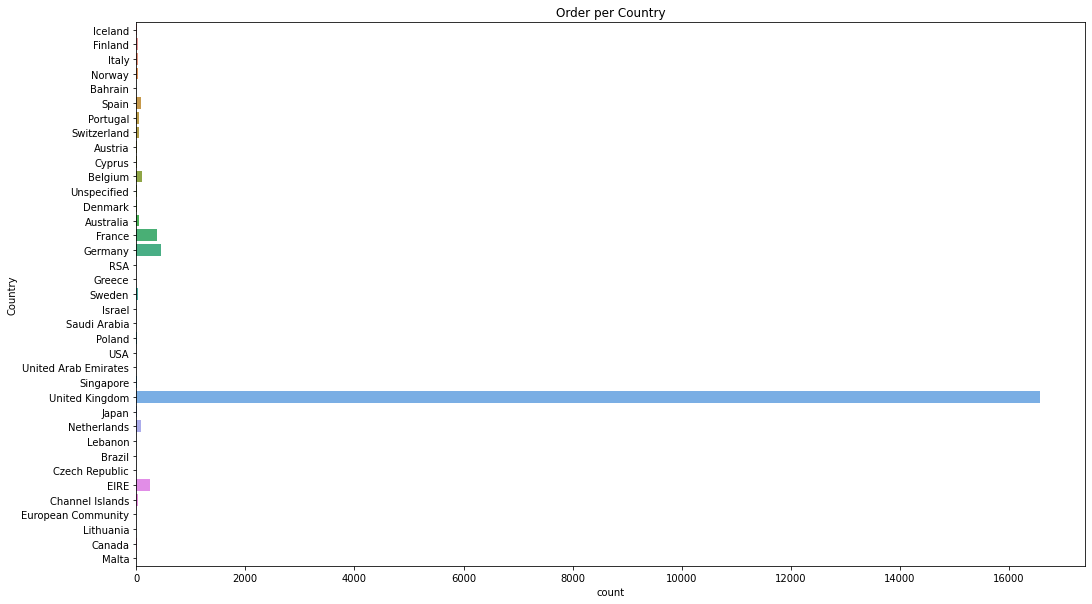

(37, 3)
                 Country  order_count  order_per
0         United Kingdom       356728  88.825809
1                Germany         9480   2.360534
2                 France         8475   2.110288
3                   EIRE         7475   1.861286
4                  Spain         2528   0.629476
5            Netherlands         2371   0.590383
6                Belgium         2069   0.515184
7            Switzerland         1877   0.467376
8               Portugal         1471   0.366281
9              Australia         1258   0.313244
10                Norway         1086   0.270416
11                 Italy          803   0.199948
12       Channel Islands          757   0.188494
13               Finland          695   0.173056
14                Cyprus          611   0.152140
15                Sweden          461   0.114790
16               Austria          401   0.099850
17               Denmark          389   0.096862
18                 Japan          358   0.089143
19          

In [99]:
#Looking into the orders on Country basis
plt.figure(1 , figsize = (17 , 10))
sns.countplot(y = 'Country' , data = datav3)
plt.title("Order per Country")
plt.show()

#analyse the orders over country
"""Implies 37 unique country from where customers are giving order
 and maximum order is coming from UK and least order is coming from Saudi Arebia
 and Uk is contributing to 89% of orders coming"""
country_analysis=pd.DataFrame(datav2['Country'].value_counts()).reset_index().rename(columns={'index':'Country','Country':'order_count'})
country_analysis=country_analysis.assign(order_per=country_analysis['order_count']/datav2.shape[0]*100)
print(country_analysis.shape)
print(country_analysis)



In [100]:
display(datav3)

,CustomerID,InvoiceNo,Country,BasketPrice,InvoiceDate
1,12347,537626,Iceland,711.79,2010-07-12 14:57:00.000001024
2,12347,542237,Iceland,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,Iceland,636.25,2011-07-04 10:42:59.999999232
4,12347,556201,Iceland,382.52,2011-09-06 13:01:00.000000256
5,12347,562032,Iceland,584.91,2011-02-08 08:48:00.000000000
...,...,...,...,...,...
18622,18283,579673,United Kingdom,220.31,2011-11-30 12:58:59.999998720
18623,18283,580872,United Kingdom,208.00,2011-06-12 12:02:00.000001792
18624,18287,554065,United Kingdom,765.28,2011-05-22 10:38:59.999998976
18625,18287,570715,United Kingdom,1001.32,2011-12-10 10:22:59.999998720


In [101]:
#preparing data at customer level
datav4=datav3.groupby(['CustomerID'])['BasketPrice'].agg(['count','sum','min','max'])
datav4.reset_index(drop = False, inplace = True)
datav4.columns=['CustomerID','#transaction','Amount_purchased','Min_Amount_purchased','Max_Amount_purchased']

print(datav4.info())
display(datav4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4329 non-null   object 
 1   #transaction          4329 non-null   int64  
 2   Amount_purchased      4329 non-null   float64
 3   Min_Amount_purchased  4329 non-null   float64
 4   Max_Amount_purchased  4329 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 169.2+ KB
None


,CustomerID,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased
0,12347,7,4310.00,224.82,1294.32
1,12348,4,1797.24,227.44,892.80
2,12349,1,1757.55,1757.55,1757.55
3,12350,1,334.40,334.40,334.40
4,12352,7,2385.71,144.35,840.30
...,...,...,...,...,...
4324,18280,1,180.60,180.60,180.60
4325,18281,1,80.82,80.82,80.82
4326,18282,2,176.60,77.84,98.76
4327,18283,16,2045.53,1.95,307.05


In [103]:
#adding last and recent purchage duration
last_date = datav3['InvoiceDate'].max().date()
last_date
first_registration = pd.DataFrame(datav3.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(datav3.groupby(by=['CustomerID'])['InvoiceDate'].max())

temp  = first_registration.applymap(lambda x:(last_date - x.date()).days)
temp2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)


datav4.loc[:, 'LastPurchase'] = temp2.reset_index(drop = False)['InvoiceDate']
datav4.loc[:, 'FirstPurchase'] = temp.reset_index(drop = False)['InvoiceDate']

print(datav4.info())
display(datav4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4329 non-null   object 
 1   #transaction          4329 non-null   int64  
 2   Amount_purchased      4329 non-null   float64
 3   Min_Amount_purchased  4329 non-null   float64
 4   Max_Amount_purchased  4329 non-null   float64
 5   LastPurchase          4329 non-null   int64  
 6   FirstPurchase         4329 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 236.9+ KB
None


,CustomerID,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase
0,12347,7,4310.00,224.82,1294.32,40,516
1,12348,4,1797.24,227.44,892.80,76,359
2,12349,1,1757.55,1757.55,1757.55,19,19
3,12350,1,334.40,334.40,334.40,311,311
4,12352,7,2385.71,144.35,840.30,73,341
...,...,...,...,...,...,...,...
4324,18280,1,180.60,180.60,180.60,160,160
4325,18281,1,80.82,80.82,80.82,4,4
4326,18282,2,176.60,77.84,98.76,216,301
4327,18283,16,2045.53,1.95,307.05,10,321


In [107]:
'''34% of customers are the new comers but not purchsed again'''
n1 = datav4[datav4['#transaction'] == 1].shape[0]
n2 = datav4.shape[0]
print("customers_purchsed_once/total_customers: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))
print(datav4[datav4['#transaction'] == 1]['LastPurchase'].describe())


customers_purchsed_once/total_customers: 1491/4329  (34.44%)
count    1491.000000
mean      177.397049
std       141.641695
min         0.000000
25%        60.000000
50%       156.000000
75%       265.000000
max       697.000000
Name: LastPurchase, dtype: float64


In [110]:
datav5=datav4.set_index(['CustomerID'])
display(datav5)

,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase
CustomerID,,,,,,
12347,7,4310.00,224.82,1294.32,40,516
12348,4,1797.24,227.44,892.80,76,359
12349,1,1757.55,1757.55,1757.55,19,19
12350,1,334.40,334.40,334.40,311,311
12352,7,2385.71,144.35,840.30,73,341
...,...,...,...,...,...,...
18280,1,180.60,180.60,180.60,160,160
18281,1,80.82,80.82,80.82,4,4
18282,2,176.60,77.84,98.76,216,301


In [111]:
#prepare data for cluster analysis
X=np.matrix(datav5)
scaler = preprocessing.StandardScaler()
scaler.fit(X)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_X = scaler.transform(X)

variables mean values: 
------------------------------------------------------------------------------------------
 [   4.25594826 1949.67732132  243.27866759  579.99623747  105.54469854
  263.85285285]


In [112]:
n_clusters = 15
inertia=[]
for k in range(1,16):
  kmeans = KMeans(init='k-means++', n_clusters = k, n_init=100,max_iter=300,random_state=27)
  kmeans.fit(scaled_X)
  inertia.append(kmeans.inertia_)
  print('cluster_{} is completed with interia: {} and maximum_iteration: {}'.format(k,kmeans.inertia_,kmeans.max_iter))

cluster_1 is completed with interia: 25974.0 and maximum_iteration: 300
cluster_2 is completed with interia: 20232.603759950776 and maximum_iteration: 300
cluster_3 is completed with interia: 16914.381764735946 and maximum_iteration: 300
cluster_4 is completed with interia: 13965.644925761633 and maximum_iteration: 300
cluster_5 is completed with interia: 11907.399112034123 and maximum_iteration: 300
cluster_6 is completed with interia: 9929.119632979733 and maximum_iteration: 300
cluster_7 is completed with interia: 8864.461449750861 and maximum_iteration: 300
cluster_8 is completed with interia: 7872.773533052105 and maximum_iteration: 300
cluster_9 is completed with interia: 6960.693397676463 and maximum_iteration: 300
cluster_10 is completed with interia: 6088.228997594242 and maximum_iteration: 300
cluster_11 is completed with interia: 5496.566238792013 and maximum_iteration: 300
cluster_12 is completed with interia: 5128.584302843346 and maximum_iteration: 300
cluster_13 is compl

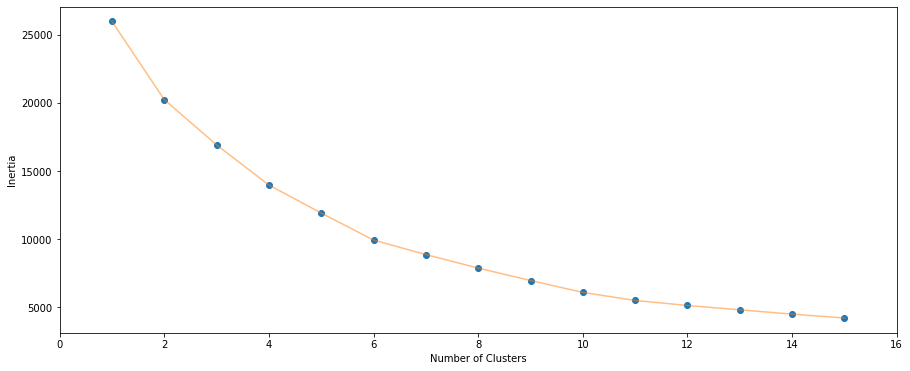

In [113]:
#choosing the optimum number of cluster
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 16) , inertia , 'o',)
plt.plot(np.arange(1 , 16) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.xlim((0,16))

plt.show()


In [122]:
#predicting the clusters and centroids for each of the clusters
kmeans = KMeans(init='k-means++', n_clusters = 8, n_init=100,max_iter=300,random_state=27)
kmeans.fit(scaled_X)
inertia.append(kmeans.inertia_)
centroid=kmeans.cluster_centers_
lables=kmeans.labels_


In [123]:
print(pd.DataFrame(pd.Series(lables).value_counts(), columns = ['no. of cust per cluster']).sum(axis=0))
print(pd.DataFrame(pd.Series(lables).value_counts(), columns = ['no. of cust per cluster']).T)


no. of cust per cluster    4329
dtype: int64
                            5     1    0    4    6   3   7  2
no. of cust per cluster  1393  1369  883  474  169  26  11  4


In [124]:
temp=datav5
temp['cluster']=lables
datav6_with_clust=temp


In [128]:
cluster_analysis = pd.DataFrame()
for i in range(8):
    test = pd.DataFrame(datav6_with_clust[datav6_with_clust['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = datav6_with_clust[datav6_with_clust['cluster'] == i].shape[0]
    cluster_analysis = pd.concat([cluster_analysis, test])

#cluster_analysis.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', cluster_analysis['size'].sum())
cluster_analysis = cluster_analysis.sort_values('size',ascending=False)
cluster_analysis


number of customers: 4329


,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase,size
cluster,,,,,,,
5.0,1.705671,514.294560,239.985794,345.338350,69.331658,101.778177,1393
1.0,4.979547,1745.589168,161.269570,570.872520,48.760409,295.399562,1369
0.0,1.562854,429.342458,231.027814,308.680566,286.953567,326.010193,883
4.0,12.082278,4796.938333,112.787848,839.685253,36.149789,545.500000,474
6.0,1.680473,2277.777225,1111.473550,1488.246574,126.420118,182.899408,169
3.0,62.500000,51421.750000,44.785385,6284.090769,12.153846,585.692308,26
7.0,1.454545,9327.389091,4676.245455,6066.389091,121.181818,158.727273,11
2.0,49.750000,214164.985000,43.487500,24004.212500,10.500000,430.500000,4


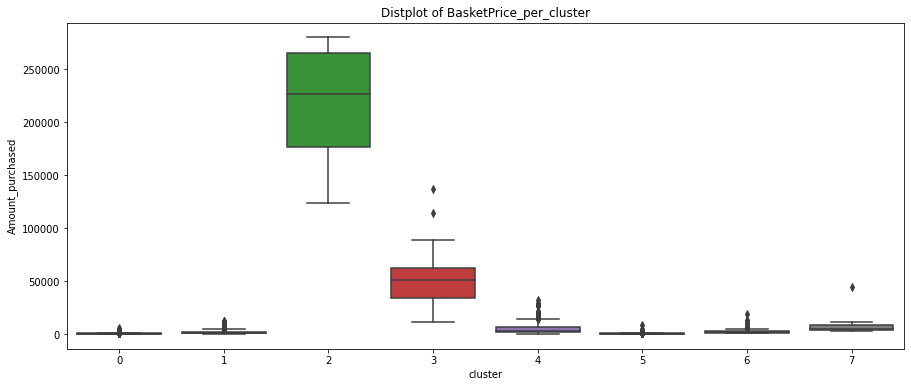

In [126]:
plt.figure(1 , figsize = (15 , 6))
sns.boxplot(y='Amount_purchased', x='cluster',
                 data=datav6_with_clust,showfliers=True)
plt.title('Distplot of {}'.format('BasketPrice_per_cluster'))
plt.show()


number of customers: 4299


,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase,size
cluster,,,,,,,
5.0,1.705671,514.294560,239.985794,345.338350,69.331658,101.778177,1393
1.0,4.979547,1745.589168,161.269570,570.872520,48.760409,295.399562,1369
0.0,1.562854,429.342458,231.027814,308.680566,286.953567,326.010193,883
4.0,12.082278,4796.938333,112.787848,839.685253,36.149789,545.500000,474
6.0,1.680473,2277.777225,1111.473550,1488.246574,126.420118,182.899408,169
7.0,1.454545,9327.389091,4676.245455,6066.389091,121.181818,158.727273,11
NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


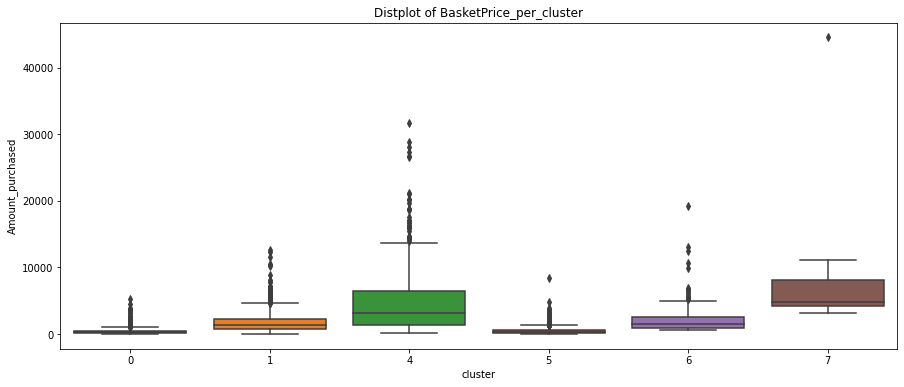

In [136]:
temp=datav6_with_clust[(datav6_with_clust['cluster']!=2) & (datav6_with_clust['cluster']!=3)]

cluster_analysis_part2 = pd.DataFrame()
for i in range(8):
    test = pd.DataFrame(temp[temp['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = temp[temp['cluster'] == i].shape[0]
    cluster_analysis_part2 = pd.concat([cluster_analysis_part2, test])

#cluster_analysis.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', cluster_analysis_part2['size'].sum())
cluster_analysis_part2 = cluster_analysis_part2.sort_values('size',ascending=False)
display(cluster_analysis_part2)

plt.figure(1 , figsize = (15 , 6))
sns.boxplot(y='Amount_purchased', x='cluster',
                 data=temp,showfliers=True)
plt.title('Distplot of {}'.format('BasketPrice_per_cluster'))
plt.show()

In [139]:
for i in range(8):
    test = datav6_with_clust[datav6_with_clust['cluster'] == i]
    #test = test.T.set_index('cluster', drop = True)
    #test['size'] = datav6_with_clust[datav6_with_clust['cluster'] == i].shape[0]
    print('Cluste_{}'.format(i))
    display(test.describe())

Cluste_0


,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase,cluster
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.0
mean,1.562854,429.342458,231.027814,308.680566,286.953567,326.010193,0.0
std,1.437773,490.236113,156.103206,243.905783,109.354388,117.273112,0.0
min,1.000000,2.900000,0.950000,2.900000,162.000000,190.000000,0.0
25%,1.000000,168.000000,114.805000,154.175000,217.000000,252.000000,0.0
50%,1.000000,307.460000,193.640000,257.230000,263.000000,297.000000,0.0
75%,2.000000,514.500000,319.585000,385.960000,313.000000,341.000000,0.0
max,34.000000,5322.840000,826.530000,2746.750000,697.000000,697.000000,0.0


Cluste_1


,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase,cluster
count,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.0
mean,4.979547,1745.589168,161.269570,570.872520,48.760409,295.399562,1.0
std,2.674253,1510.366878,122.344737,431.577448,42.181741,56.920487,0.0
min,2.000000,70.020000,0.390000,31.300000,0.000000,129.000000,1.0
25%,3.000000,712.240000,67.500000,301.320000,16.000000,255.000000,1.0
50%,4.000000,1314.450000,128.700000,441.610000,33.000000,298.000000,1.0
75%,6.000000,2287.230000,240.600000,719.150000,75.000000,333.000000,1.0
max,19.000000,12652.980000,662.900000,3376.080000,177.000000,516.000000,1.0


Cluste_2


,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase,cluster
count,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.0
mean,49.750000,214164.985000,43.48750,24004.212500,10.500000,430.500000,2.0
std,22.691775,70629.517383,33.39887,4627.009146,10.661457,99.063952,0.0
min,20.000000,123819.990000,2.08000,20277.920000,2.000000,335.000000,2.0
25%,39.500000,176018.220000,26.44000,21723.980000,2.750000,350.000000,2.0
50%,53.000000,226537.465000,45.63500,22490.965000,7.500000,435.500000,2.0
75%,63.250000,264684.230000,62.68250,24771.197500,15.250000,516.000000,2.0
max,73.000000,279765.020000,80.60000,30757.000000,25.000000,516.000000,2.0


Cluste_3


,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase,cluster
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,62.500000,51421.750000,44.785385,6284.090769,12.153846,585.692308,3.0
std,49.671924,28546.808393,46.455267,4474.802753,13.480927,144.931092,0.0
min,13.000000,10969.760000,0.950000,336.880000,0.000000,304.000000,3.0
25%,31.500000,33671.337500,18.510000,2651.585000,3.000000,531.250000,3.0
50%,49.000000,50971.395000,32.000000,5482.975000,7.500000,652.000000,3.0
75%,79.250000,62662.687500,49.575000,9782.745000,16.500000,697.000000,3.0
max,205.000000,136691.060000,179.000000,16468.720000,53.000000,697.000000,3.0


Cluste_4


,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase,cluster
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.0
mean,12.082278,4796.938333,112.787848,839.685253,36.149789,545.500000,4.0
std,8.439035,5001.424851,112.247063,944.226748,42.583890,115.245326,0.0
min,2.000000,154.830000,0.380000,78.200000,0.000000,267.000000,4.0
25%,6.000000,1419.230000,19.935000,363.845000,10.000000,485.000000,4.0
50%,10.000000,3157.915000,87.300000,528.920000,20.000000,546.000000,4.0
75%,17.000000,6403.847500,164.060000,966.847500,45.750000,666.000000,4.0
max,55.000000,31726.820000,712.300000,8895.760000,226.000000,697.000000,4.0


Cluste_5


,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase,cluster
count,1393.000000,1393.00000,1393.000000,1393.000000,1393.000000,1393.000000,1393.0
mean,1.705671,514.29456,239.985794,345.338350,69.331658,101.778177,5.0
std,1.023195,547.54267,156.819920,266.855795,53.553341,59.871057,0.0
min,1.000000,6.20000,0.400000,5.900000,0.000000,0.000000,5.0
25%,1.000000,196.89000,117.350000,170.320000,23.000000,51.000000,5.0
50%,1.000000,348.91000,209.490000,302.250000,54.000000,92.000000,5.0
75%,2.000000,633.92000,331.950000,437.500000,107.000000,155.000000,5.0
max,8.000000,8438.34000,778.650000,3080.440000,189.000000,237.000000,5.0


Cluste_6


,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase,cluster
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.0
mean,1.680473,2277.777225,1111.473550,1488.246574,126.420118,182.899408,6.0
std,1.171958,2408.551647,424.950559,1079.706819,100.903395,111.398825,0.0
min,1.000000,671.690000,482.800000,671.690000,1.000000,1.000000,6.0
25%,1.000000,957.970000,810.510000,919.980000,53.000000,81.000000,6.0
50%,1.000000,1506.120000,969.740000,1213.000000,86.000000,173.000000,6.0
75%,2.000000,2601.550000,1253.220000,1710.390000,182.000000,288.000000,6.0
max,7.000000,19226.220000,2661.240000,9341.260000,666.000000,666.000000,6.0


Cluste_7


,#transaction,Amount_purchased,Min_Amount_purchased,Max_Amount_purchased,LastPurchase,FirstPurchase,cluster
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,1.454545,9327.389091,4676.245455,6066.389091,121.181818,158.727273,7.0
std,0.687552,11924.287637,1311.199063,5217.236871,81.690658,85.896555,0.0
min,1.000000,3096.000000,3096.000000,3096.000000,30.000000,44.000000,7.0
25%,1.000000,4161.670000,3934.810000,3993.805000,72.500000,85.000000,7.0
50%,1.000000,4873.810000,4314.720000,4314.720000,88.000000,151.000000,7.0
75%,2.000000,8135.330000,4867.225000,5540.445000,166.500000,216.500000,7.0
max,3.000000,44534.300000,7837.500000,21535.900000,305.000000,305.000000,7.0


In [154]:
temp1=datav6_with_clust.reset_index()
temp0=datav3
datav3_with_clust=temp0.merge(temp1,on = ['CustomerID'])
datav3_with_clust.columns
datav3_with_clust=datav3_with_clust.drop(columns=['#transaction','Amount_purchased','Min_Amount_purchased','Max_Amount_purchased','LastPurchase','FirstPurchase'])
datav3_with_clust['weekday']=datav3_with_clust['InvoiceDate'].dt.day_name()

datav3_with_clust['month']=datav3_with_clust['InvoiceDate'].dt.month_name()

datav3_with_clust['quarter']=datav3_with_clust['InvoiceDate'].dt.quarter

datav3_with_clust['year']=datav3_with_clust['InvoiceDate'].dt.year
datav3_with_clust

,CustomerID,InvoiceNo,Country,BasketPrice,InvoiceDate,cluster,weekday,month,quarter,year
0,12347,537626,Iceland,711.79,2010-07-12 14:57:00.000001024,4,Monday,July,3,2010
1,12347,542237,Iceland,475.39,2011-01-26 14:29:59.999999744,4,Wednesday,January,1,2011
2,12347,549222,Iceland,636.25,2011-07-04 10:42:59.999999232,4,Monday,July,3,2011
3,12347,556201,Iceland,382.52,2011-09-06 13:01:00.000000256,4,Tuesday,September,3,2011
4,12347,562032,Iceland,584.91,2011-02-08 08:48:00.000000000,4,Tuesday,February,1,2011
...,...,...,...,...,...,...,...,...,...,...
18419,18283,579673,United Kingdom,220.31,2011-11-30 12:58:59.999998720,1,Wednesday,November,4,2011
18420,18283,580872,United Kingdom,208.00,2011-06-12 12:02:00.000001792,1,Sunday,June,2,2011
18421,18287,554065,United Kingdom,765.28,2011-05-22 10:38:59.999998976,1,Sunday,May,2,2011
18422,18287,570715,United Kingdom,1001.32,2011-12-10 10:22:59.999998720,1,Saturday,December,4,2011


Cluster_0


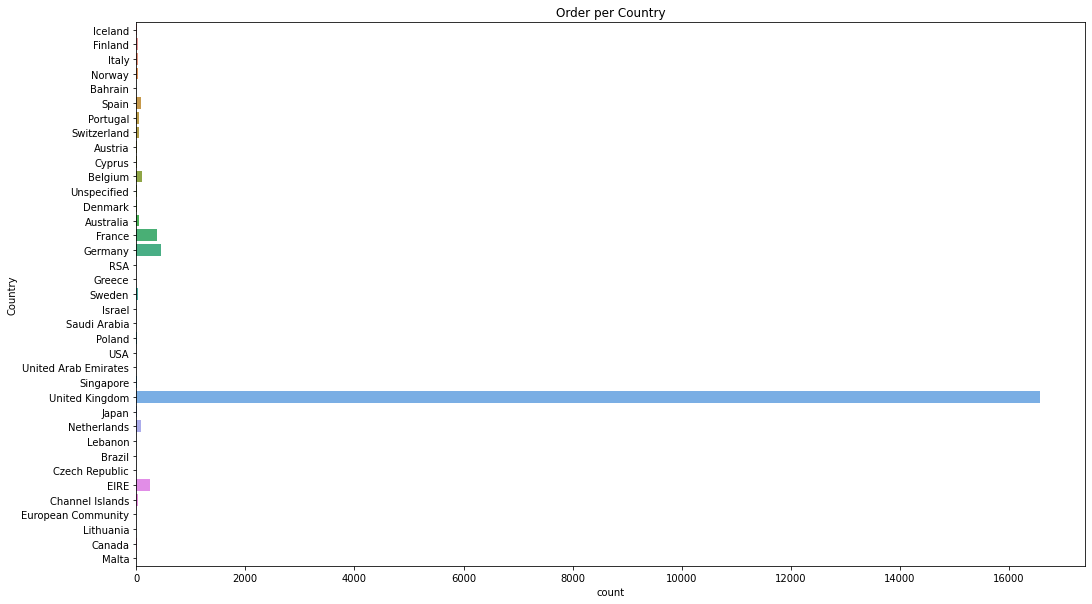

(26, 3)
            Country  order_count  order_per
0    United Kingdom         1274  92.318841
1            France           24   1.739130
2           Germany           17   1.231884
3             Spain            9   0.652174
4          Portugal            6   0.434783
5           Austria            5   0.362319
6       Switzerland            5   0.362319
7         Australia            4   0.289855
8         Lithuania            4   0.289855
9   Channel Islands            3   0.217391
10          Belgium            3   0.217391
11            Italy            3   0.217391
12          Finland            3   0.217391
13      Netherlands            3   0.217391
14           Norway            2   0.144928
15           Israel            2   0.144928
16            Japan            2   0.144928
17           Cyprus            2   0.144928
18           Canada            2   0.144928
19           Poland            1   0.072464
20           Greece            1   0.072464
21          Bahrain     

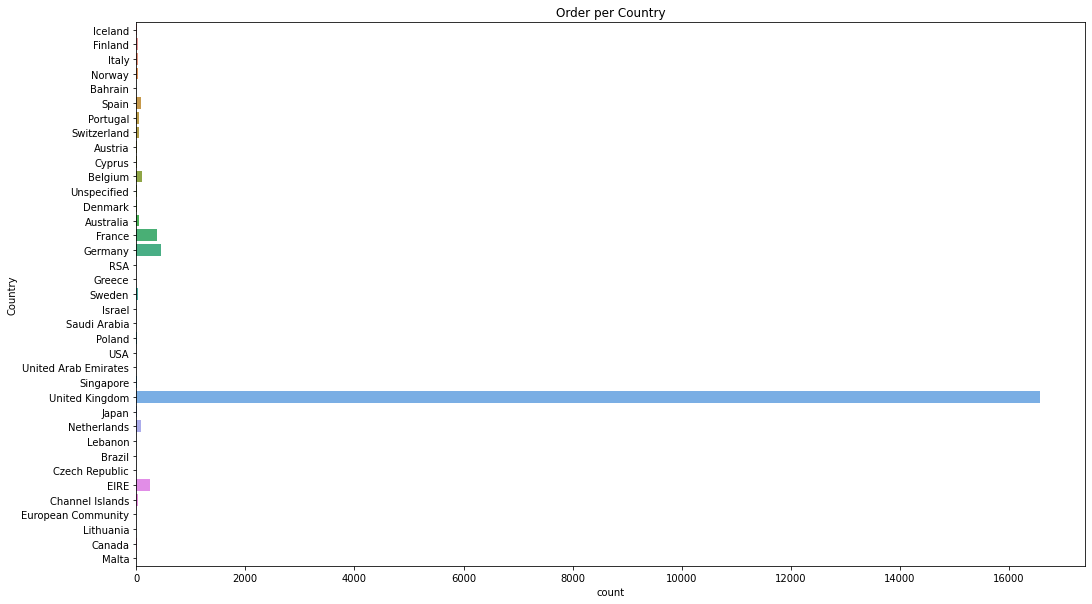

(23, 3)
                 Country  order_count  order_per
0         United Kingdom         6226  91.330497
1                 France          153   2.244389
2                Germany          132   1.936336
3                Belgium           61   0.894822
4                Finland           32   0.469415
5                  Spain           29   0.425407
6                  Italy           26   0.381399
7               Portugal           23   0.337392
8                 Norway           22   0.322723
9            Switzerland           17   0.249377
10       Channel Islands           15   0.220038
11             Australia           15   0.220038
12           Netherlands           14   0.205369
13                Sweden           14   0.205369
14                Cyprus           10   0.146692
15               Denmark            6   0.088015
16                Poland            5   0.073346
17    European Community            4   0.058677
18                 Malta            4   0.058677
19          

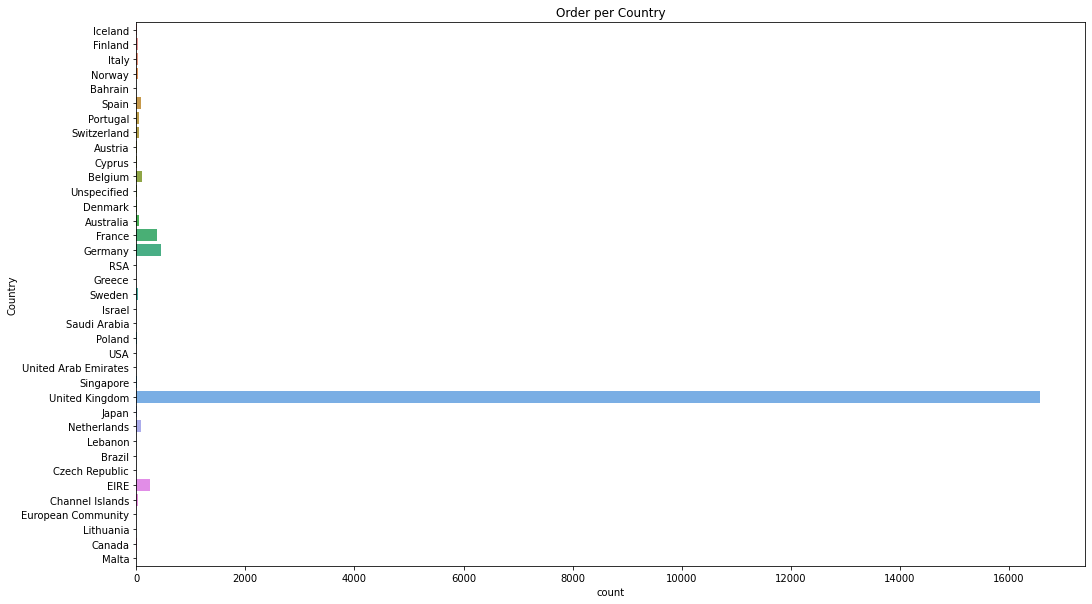

(3, 3)
          Country  order_count  order_per
0  United Kingdom          106  53.266332
1     Netherlands           73  36.683417
2       Australia           20  10.050251
Cluster_3


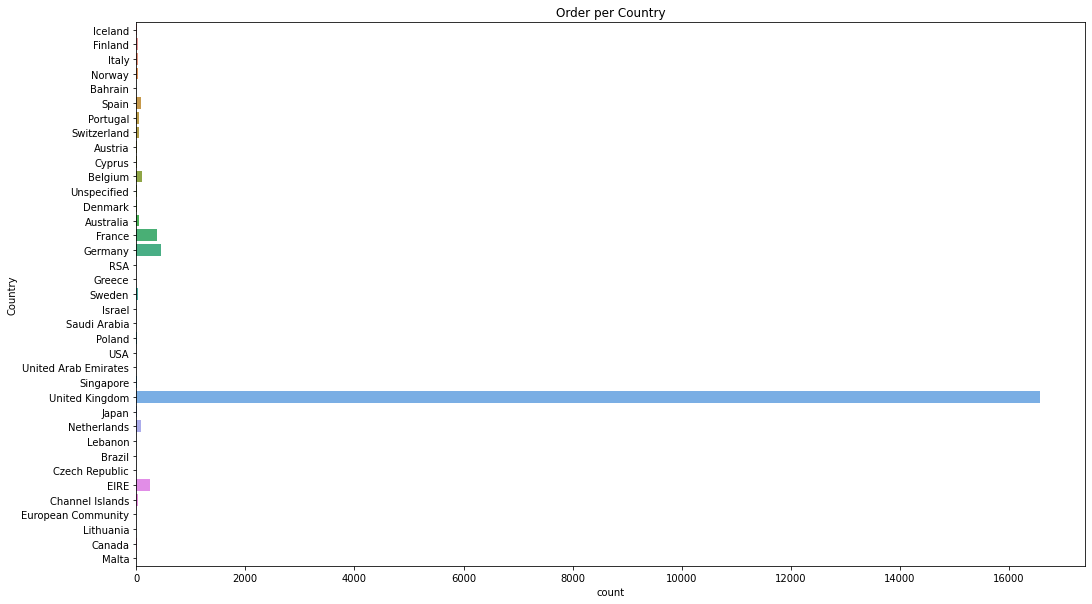

(2, 3)
          Country  order_count  order_per
0  United Kingdom         1370  84.307692
1            EIRE          255  15.692308
Cluster_4


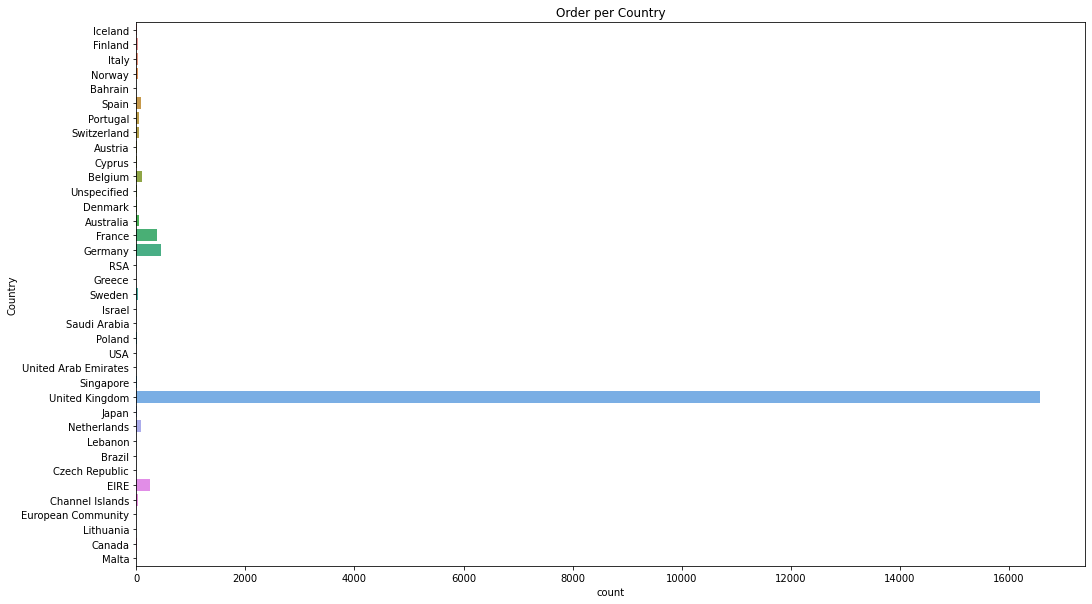

(13, 3)
           Country  order_count  order_per
0   United Kingdom         5238  91.461498
1          Germany          227   3.963681
2           France          142   2.479483
3            Spain           30   0.523834
4           Sweden           15   0.261917
5          Belgium           14   0.244456
6        Australia           13   0.226995
7         Portugal           12   0.209534
8           Poland            8   0.139689
9            Japan            8   0.139689
10         Iceland            7   0.122228
11          Norway            7   0.122228
12     Switzerland            6   0.104767
Cluster_5


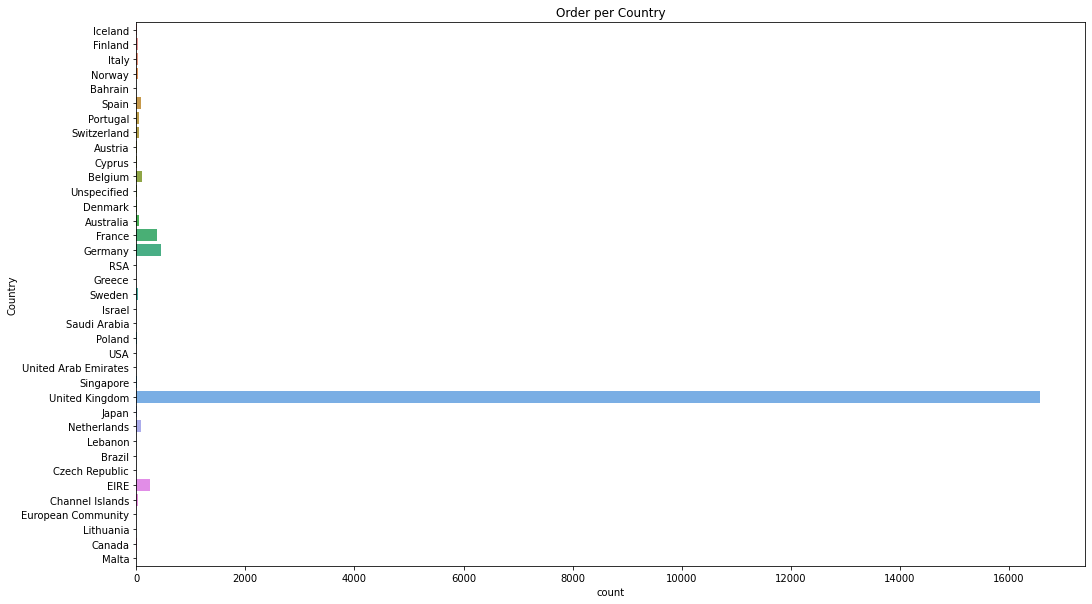

(24, 3)
            Country  order_count  order_per
0    United Kingdom         2144  90.235690
1           Germany           62   2.609428
2            France           60   2.525253
3             Spain           15   0.631313
4           Belgium           12   0.505051
5       Switzerland            9   0.378788
6          Portugal            8   0.336700
7       Unspecified            8   0.336700
8           Austria            8   0.336700
9           Denmark            7   0.294613
10           Poland            5   0.210438
11          Finland            5   0.210438
12           Sweden            5   0.210438
13           Canada            4   0.168350
14            Italy            4   0.168350
15      Netherlands            4   0.168350
16  Channel Islands            3   0.126263
17           Cyprus            3   0.126263
18           Greece            2   0.084175
19              USA            2   0.084175
20            Japan            2   0.084175
21        Australia     

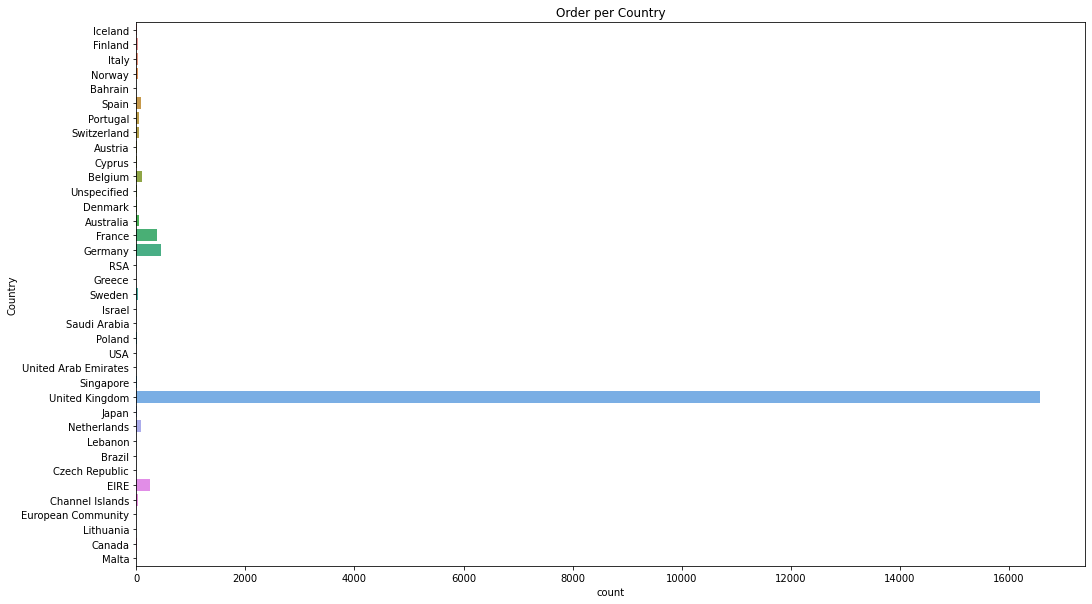

(24, 3)
                 Country  order_count  order_per
0         United Kingdom          196  69.014085
1                Germany           16   5.633803
2            Switzerland            9   3.169014
3                Belgium            8   2.816901
4              Singapore            6   2.112676
5                  Spain            6   2.112676
6                 France            5   1.760563
7                  Italy            5   1.760563
8                  Japan            4   1.408451
9        Channel Islands            4   1.408451
10              Portugal            4   1.408451
11                  EIRE            4   1.408451
12                Greece            2   0.704225
13               Austria            2   0.704225
14                Israel            2   0.704225
15                Norway            2   0.704225
16               Denmark            2   0.704225
17               Finland            1   0.352113
18                 Malta            1   0.352113
19          

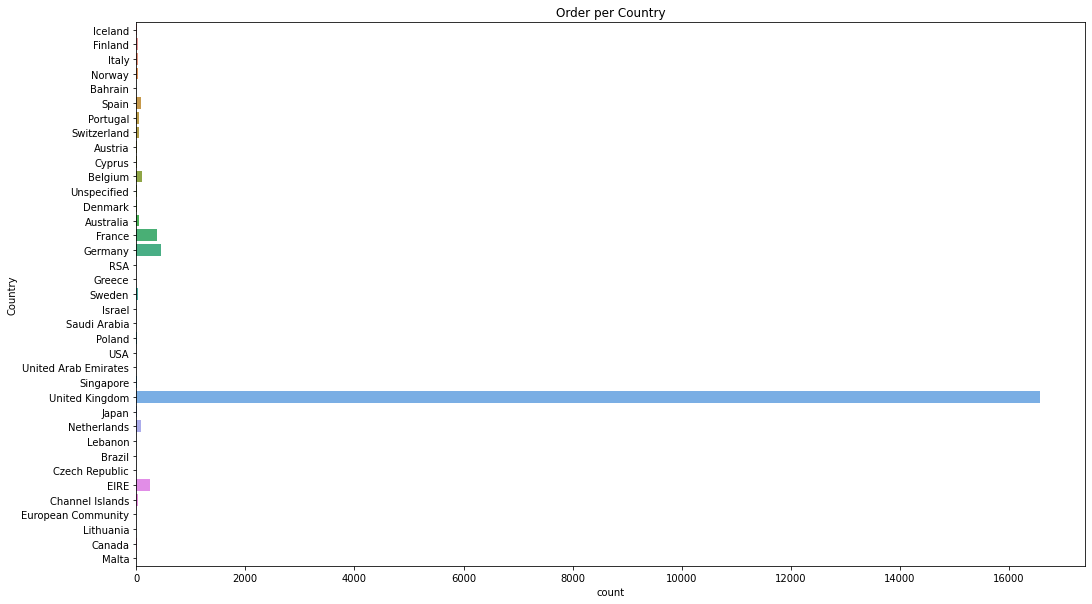

(6, 3)
          Country  order_count  order_per
0  United Kingdom            6      37.50
1     Switzerland            4      25.00
2          France            2      12.50
3         Denmark            2      12.50
4          Norway            1       6.25
5          Israel            1       6.25


'Implies 37 unique country from where customers are giving order\n and maximum order is coming from UK and least order is coming from Saudi Arebia\n and Uk is contributing to 89% of orders coming'

In [159]:
#analyse the clusters over geography if we find some pattern
for i in range(8):
    print('Cluster_{}'.format(i))
    test = datav3_with_clust[datav3_with_clust['cluster'] == i]
    plt.figure(1 , figsize = (17 , 10))
    sns.countplot(y = 'Country' , data = datav3)
    plt.title("Order per Country")
    plt.show()

    temp=pd.DataFrame(test['Country'].value_counts()).reset_index().rename(columns={'index':'Country','Country':'order_count'})
    temp=temp.assign(order_per=temp['order_count']/test.shape[0]*100)
    print(temp.shape)
    print(temp)





In [167]:
temp1=datav6_with_clust.reset_index()
temp0=datav2
datav2_with_clust=temp0.merge(temp1,on = ['CustomerID'])
datav2_with_clust.columns
datav2_with_clust=datav2_with_clust.drop(columns=['#transaction','Amount_purchased','Min_Amount_purchased','Max_Amount_purchased','LastPurchase','FirstPurchase'])
datav2_with_clust['StockCode_clean']=datav2_with_clust['StockCode'].str[:5]
datav2_with_clust=datav2_with_clust.drop(columns=['StockCode'])
datav2_with_clust.head

<bound method NDFrame.head of        InvoiceNo                          Description  ...  cluster StockCode_clean
0         536365   WHITE HANGING HEART T-LIGHT HOLDER  ...        0           85123
1         536365                  WHITE METAL LANTERN  ...        0           71053
2         536365       CREAM CUPID HEARTS COAT HANGER  ...        0           84406
3         536365  KNITTED UNION FLAG HOT WATER BOTTLE  ...        0           84029
4         536365       RED WOOLLY HOTTIE WHITE HEART.  ...        0           84029
...          ...                                  ...  ...      ...             ...
401192    581578         SET OF 4 PANTRY JELLY MOULDS  ...        6           22993
401193    581578     PACK OF 20 NAPKINS PANTRY DESIGN  ...        6           22907
401194    581578        PACK OF 20 NAPKINS RED APPLES  ...        6           22908
401195    581578     JINGLE BELL HEART ANTIQUE SILVER  ...        6           23215
401196    581578          RIBBON REEL MAKING S

In [189]:
list_special_codes = datav2_with_clust[datav2_with_clust['StockCode_clean'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode_clean'].unique()
list_special_codes
temp0=test[['StockCode_clean','Description']].drop_duplicates()
temp0.shape

(720, 2)

In [192]:
#analyse the clusters over products if we find some pattern
for i in range(8):
    print('Cluster_{}'.format(i))
    test = datav2_with_clust[datav2_with_clust['cluster'] == i]
    
    temp=pd.DataFrame(test['StockCode_clean'].value_counts()).reset_index().rename(columns={'index':'StockCode_clean','StockCode_clean':'Product_count'})
    #temp=temp.assign(product_per=temp['Product_count']/test.shape[0]*100)
    temp=temp.merge(temp0,how='left',on=['StockCode_clean'])
    print(temp.shape)
    display(temp)

Cluster_0
(2730, 3)


,StockCode_clean,Product_count,Description
0,85123,191,WHITE HANGING HEART T-LIGHT HOLDER
1,85099,151,JUMBO BAG RED RETROSPOT
2,85099,151,JUMBO BAG BAROQUE BLACK WHITE
3,22423,145,REGENCY CAKESTAND 3 TIER
4,47566,127,TEA TIME PARTY BUNTING
...,...,...,...
2725,23435,1,NaN
2726,23423,1,NaN
2727,21898,1,NaN
2728,21461,1,NaN


Cluster_1
(3071, 3)


,StockCode_clean,Product_count,Description
0,85099,1069,JUMBO BAG RED RETROSPOT
1,85099,1069,JUMBO BAG BAROQUE BLACK WHITE
2,85123,789,WHITE HANGING HEART T-LIGHT HOLDER
3,47566,645,TEA TIME PARTY BUNTING
4,47566,645,PARTY BUNTING
...,...,...,...
3066,72815,1,NaN
3067,71143,1,NaN
3068,90046,1,NaN
3069,20667,1,NaN


Cluster_2
(1034, 3)


,StockCode_clean,Product_count,Description
0,22629,31,SPACEBOY LUNCH BOX
1,22326,28,ROUND SNACK BOXES SET OF4 WOODLAND
2,POST,25,NaN
3,22630,25,DOLLY GIRL LUNCH BOX
4,85099,25,JUMBO BAG RED RETROSPOT
...,...,...,...
1029,23009,1,NaN
1030,84988,1,SET OF 72 PINK HEART PAPER DOILIES
1031,22514,1,NaN
1032,22735,1,NaN


Cluster_3
(2772, 3)


,StockCode_clean,Product_count,Description
0,85099,378,JUMBO BAG RED RETROSPOT
1,85099,378,JUMBO BAG BAROQUE BLACK WHITE
2,22423,175,REGENCY CAKESTAND 3 TIER
3,85123,164,WHITE HANGING HEART T-LIGHT HOLDER
4,15056,159,EDWARDIAN PARASOL BLACK
...,...,...,...
2767,21397,1,NaN
2768,81950,1,NaN
2769,23021,1,NaN
2770,16206,1,NaN


Cluster_4
(2980, 3)


,StockCode_clean,Product_count,Description
0,85099,1015,JUMBO BAG RED RETROSPOT
1,85099,1015,JUMBO BAG BAROQUE BLACK WHITE
2,85123,663,WHITE HANGING HEART T-LIGHT HOLDER
3,22423,644,REGENCY CAKESTAND 3 TIER
4,47566,581,TEA TIME PARTY BUNTING
...,...,...,...
2975,22039,1,BOTANICAL LILY GIFT WRAP
2976,90188,1,NaN
2977,37503,1,NaN
2978,21460,1,NaN


Cluster_5
(2835, 3)


,StockCode_clean,Product_count,Description
0,85099,275,JUMBO BAG RED RETROSPOT
1,85099,275,JUMBO BAG BAROQUE BLACK WHITE
2,85123,215,WHITE HANGING HEART T-LIGHT HOLDER
3,22423,201,REGENCY CAKESTAND 3 TIER
4,84879,199,ASSORTED COLOUR BIRD ORNAMENT
...,...,...,...
2830,22482,1,NaN
2831,84840,1,NaN
2832,21763,1,NaN
2833,90123,1,NaN


Cluster_6
(2159, 3)


,StockCode_clean,Product_count,Description
0,85099,79,JUMBO BAG RED RETROSPOT
1,85099,79,JUMBO BAG BAROQUE BLACK WHITE
2,22423,73,REGENCY CAKESTAND 3 TIER
3,22960,54,JAM MAKING SET WITH JARS
4,84997,53,CHILDRENS CUTLERY POLKADOT PINK
...,...,...,...
2154,20716,1,NaN
2155,21614,1,NaN
2156,21275,1,NaN
2157,23444,1,NaN


Cluster_7
(720, 3)


,StockCode_clean,Product_count,Description
0,23298,7,SPOTTY BUNTING
1,21212,7,PACK OF 72 RETROSPOT CAKE CASES
2,84997,6,CHILDRENS CUTLERY POLKADOT PINK
3,84997,6,CHILDRENS CUTLERY RETROSPOT RED
4,84997,6,CHILDRENS CUTLERY POLKADOT BLUE
...,...,...,...
715,22489,1,PACK OF 12 TRADITIONAL CRAYONS
716,22750,1,FELTCRAFT PRINCESS LOLA DOLL
717,22483,1,RED GINGHAM TEDDY BEAR
718,22890,1,NOVELTY BISCUITS CAKE STAND 3 TIER


In [195]:
datav3_with_clust
#analyse the clusters over products if we find some pattern
for i in range(8):
    print('Cluster_{}'.format(i))
    test = datav3_with_clust[datav3_with_clust['cluster'] == i]
    
    temp=pd.DataFrame(test['weekday'].value_counts()).reset_index().rename(columns={'index':'weekday','weekday':'weekday_count'})
    temp=temp.assign(product_per=temp['weekday_count']/test.shape[0]*100)
    
    print(temp.shape)
    display(temp)

Cluster_0
(7, 3)


,weekday,weekday_count,product_per
0,Thursday,263,19.057971
1,Tuesday,247,17.898551
2,Friday,218,15.797101
3,Sunday,204,14.782609
4,Wednesday,191,13.840580
5,Monday,179,12.971014
6,Saturday,78,5.652174


Cluster_1
(7, 3)


,weekday,weekday_count,product_per
0,Thursday,1289,18.908611
1,Tuesday,1148,16.840252
2,Wednesday,1042,15.285316
3,Monday,1010,14.815901
4,Friday,998,14.639871
5,Sunday,950,13.935749
6,Saturday,380,5.574300


Cluster_2
(7, 3)


,weekday,weekday_count,product_per
0,Tuesday,51,25.628141
1,Thursday,44,22.110553
2,Monday,32,16.080402
3,Friday,30,15.075377
4,Wednesday,30,15.075377
5,Saturday,6,3.015075
6,Sunday,6,3.015075


Cluster_3
(7, 3)


,weekday,weekday_count,product_per
0,Wednesday,306,18.830769
1,Thursday,275,16.923077
2,Tuesday,274,16.861538
3,Monday,257,15.815385
4,Friday,233,14.338462
5,Sunday,193,11.876923
6,Saturday,87,5.353846


Cluster_4
(7, 3)


,weekday,weekday_count,product_per
0,Thursday,1089,19.015191
1,Tuesday,1007,17.583377
2,Friday,888,15.505500
3,Wednesday,853,14.894360
4,Monday,800,13.968919
5,Sunday,714,12.467260
6,Saturday,376,6.565392


Cluster_5
(7, 3)


,weekday,weekday_count,product_per
0,Thursday,460,19.360269
1,Monday,385,16.203704
2,Friday,369,15.530303
3,Tuesday,368,15.488215
4,Sunday,337,14.183502
5,Wednesday,318,13.383838
6,Saturday,139,5.850168


Cluster_6
(7, 3)


,weekday,weekday_count,product_per
0,Thursday,56,19.718310
1,Tuesday,52,18.309859
2,Wednesday,42,14.788732
3,Friday,41,14.436620
4,Monday,41,14.436620
5,Sunday,36,12.676056
6,Saturday,16,5.633803


Cluster_7
(6, 3)


,weekday,weekday_count,product_per
0,Thursday,6,37.50
1,Tuesday,5,31.25
2,Monday,2,12.50
3,Friday,1,6.25
4,Saturday,1,6.25
5,Wednesday,1,6.25
